In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
t1 = glob.glob(r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\MICCAI_BraTS_2018_Data_Training\\*\\*\\*t1.nii.gz')
t2 = glob.glob(r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\MICCAI_BraTS_2018_Data_Training\\*\\*\\*t2.nii.gz')
flair = glob.glob(r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\MICCAI_BraTS_2018_Data_Training\\*\\*\\*flair.nii.gz')
t1ce = glob.glob(r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\MICCAI_BraTS_2018_Data_Training\\*\\*\\*t1ce.nii.gz')
seg = glob.glob(r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\MICCAI_BraTS_2018_Data_Training\\*\\*\\*seg.nii.gz')

In [4]:
import SimpleITK as sitk
from skimage.morphology import ball, disk, dilation, binary_erosion, remove_small_objects, erosion, closing, reconstruction, binary_closing
from scipy import ndimage as ndi
from skimage.measure import label, regionprops
from skimage.filters import roberts

def read_img(img_path):
    return sitk.GetArrayFromImage(sitk.ReadImage(img_path))

def get_mask(img):
    binary = img>0
    selem = disk(2)
    # the erosion and closure operation 
    binary = binary_erosion(binary, selem)
    binary = binary_closing(binary, selem)
    # fill in the small holes
    edges = roberts(binary)
    binary = ndi.binary_fill_holes(edges)
    # get the number of areas
    areas = [r.area for r in regionprops(label(binary))]
    return binary,len(areas)

def label_slices(seg):
    slice_label = []
    for seg_slice in seg[:]:
        slice_sum = sum(sum(seg_slice))
        if slice_sum > 0:
            slice_label.append(1)
        else:
            slice_label.append(0)
    for index in range(len(slice_label)-10):
        # delete ambiguous slices
        if sum(slice_label[index:index+10])>0 and sum(slice_label[index:index+10])<10:
            slice_label[index] = -1
    return slice_label

def img_normalize_std(img):
    # normalize each image for different case
    maximg = img.mean()
    std = img.std()
    return (img - mean) / std
def img_normalize_minmax(img):
    assert isinstance(img, np.ndarray)
    img_max = np.percentile(img, 99.9)
    img_min = np.percentile(img, 0.1)
    new = img - img_min
    new /= (img_max-img_min)
    new = np.where(new>0,new,0)
    new = np.where(new<1,new,1)
    result = new*255
    return result

In [14]:
path_base = r'D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\'
if not os.path.exists(path_base+'t2_1'):
    os.mkdir(path_base + 't2_1')
if not os.path.exists(path_base+'t2_0'):
    os.mkdir(path_base + 't2_0')

if not os.path.exists(path_base+'t1_1'):
    os.mkdir(path_base + 't1_1')
if not os.path.exists(path_base+'t1_0'):
    os.mkdir(path_base + 't1_0')

if not os.path.exists(path_base+'t1ce_1'):
    os.mkdir(path_base + 't1ce_1')
if not os.path.exists(path_base+'t1ce_0'):
    os.mkdir(path_base + 't1ce_0')    
    
if not os.path.exists(path_base+'flair_1'):
    os.mkdir(path_base + 'flair_1')
if not os.path.exists(path_base+'flair_0'):
    os.mkdir(path_base + 'flair_0') 
    
for index in range(len(t2)):
    t2_now = img_normalize_minmax(read_img(t2[index]))
    t1_now = img_normalize_minmax(read_img(t1[index]))
    t1ce_now = img_normalize_minmax(read_img(t1ce[index]))
    flair_now = img_normalize_minmax(read_img(flair[index]))
    seg_now = read_img(seg[index]).astype(np.uint8)
    slice_label = label_slices(seg_now)
    for slice_index in range (t2_now.shape[0]):
        t2_slice_now = t2_now[slice_index]
        mask, area_num = get_mask(t2_slice_now)
        if area_num>1 or sum(sum(mask))<7000:
            continue 
        if slice_label[slice_index]==-1:
            continue
        flair_slice_now = flair_now[slice_index]
        t1_slice_now = t1_now[slice_index]
        t1ce_slice_now = t1ce_now[slice_index]
        t2_slice_now = t2_now[slice_index]
        fileName_t2 = path_base + 't2_' + str(slice_label[slice_index]) + '\\' + str(slice_label[slice_index]) + '_' + str(index) + '_' + str(slice_index) + '.jpg'
        print(fileName_t2)
        fileName_flair = path_base + 'flair_' + str(slice_label[slice_index]) + '\\' + str(slice_label[slice_index]) + '_' + str(index) + '_' + str(slice_index) + '.jpg'
        fileName_t1 = path_base + 't1_' + str(slice_label[slice_index]) + '\\' + str(slice_label[slice_index]) + '_' + str(index) + '_' + str(slice_index) + '.jpg'
        cv2.imwrite(fileName_t2, t2_slice_now)
        cv2.imwrite(fileName_t1, t1_slice_now)
        cv2.imwrite(fileName_flair, flair_slice_now)

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_0_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_1_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_3_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_5_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_5_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_6_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_7_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_7_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_8_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_8_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_201

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_9_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_201

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_11_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_11_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_11_61.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_12_114.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_14_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_14_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_14_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_14_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_14_99.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_16_61.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_17_110.jpg
D:\\Duke_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_19_91.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_21_68.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_24_106.jpg
D:\\Duke_Prj\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_26_70.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_27_125.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_28_50.jpg
D:\\Duke_Prj

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_29_106.jpg
D:\\Duke_Prj\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_31_75.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_32_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_32_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_32_125.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_32_126.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_33_44.jpg
D:\\Duke_Prj\\2-

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_34_89.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_36_66.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_37_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_37_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_37_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_37_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_37_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_38_48.jpg
D:\\Duke_Prj\\2

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_39_108.jpg
D:\\Duke_Pr

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_41_90.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_43_66.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_44_122.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_46_76.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_48_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_48_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_48_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_48_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_48_57.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_49_107.jpg
D:\\Duke_Prj

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_51_79.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_52_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_52_125.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_53_47.jpg
D:\\Duke_Prj\\2-MI

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_54_109.jpg
D:\\Duke_P

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_56_82.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_30.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_31.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_58_46.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_59_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_59_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_59_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_59_111.jpg
D:\\Duke_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_61_85.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_64_90.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_66_64.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_67_105.jpg
D:\\Duke_Prj\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_69_62.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_70_117.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_74_61.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_75_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_75_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_75_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_75_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_76_43.jpg
D:\\Duke_Prj\\2-

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_77_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_77_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_77_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_77_100.jpg
D:\\Duke_Prj\\2-MIC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_79_64.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_80_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_81_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_81_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_81_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_81_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_81_44.jpg
D:\\Duke_Pr

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_82_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_82_107.jpg
D:\\Duke_Prj\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_84_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_84_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_84_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_84_98.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_86_81.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_88_62.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_89_101.jpg
D:\\Duke_Prj\\2-MI

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_91_68.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_92_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_30.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_31.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_32.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_33.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_93_35.jpg
D:\\Duke_Prj

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_94_87.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_96_65.jpg
D:\\Duke_Prj\\2-MICC

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_97_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_98_55.jpg
D:\\Duke_Prj\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_99_115.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_101_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_103_72.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_104_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_105_46.jpg

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_106_84.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_108_104.jpg
D

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_110_69.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_111_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_112_29.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_112_30.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_112_31.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_112_32.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_112_33.j

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_113_99.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_115_72.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_116_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_118_75.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_120_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_120_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_120_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_120_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_120_66.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_123_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_123_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_123_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_123_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_123_75.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_124_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_125_46.jp

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_126_102.jpg
D:\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_128_66.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_129_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_130_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_130_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_130_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_130_38.

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_131_91.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_133_66.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_134_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_136_75.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_138_48.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_139_103.jpg
D:

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_31.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_32.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_33.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_143_44.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_144_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_144_98.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_146_68.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_147_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_147_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_148_50.jpg
D:\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_149_98.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_151_73.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_152_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_153_48.jpg


D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_154_101.jpg
D:\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_156_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_156_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_156_94.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_158_64.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_159_107.jp

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_161_86.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_163_61.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_164_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_165_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_166_85.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_168_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_168_66.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_169_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_169_113.jpg


D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_171_98.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_173_65.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_174_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_175_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_175_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_175_41

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_176_103.jpg
D:

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_178_70.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_179_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_179_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_179_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_179_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_179_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_180_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_180_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_180_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_180_59.jpg
D

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_181_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_181_117.j

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_183_89.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_184_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_184_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_29.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_30.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_31.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_32.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_33.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_34.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_185_40.jpg
D:\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_186_99.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_188_58.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_189_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_189_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_189_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_189_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_189_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_189_108.j

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_191_80.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_192_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_192_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_193_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_193_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_193_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_193_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_193_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_193_64.jpg
D:\\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_194_104.jpg
D

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_196_98.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_198_65.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_199_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_199_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_199_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_199_110.jpg
D:\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_201_74.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_203_59.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_204_1

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_206_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_206_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_206_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_206_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_206_89.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_208_63.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_209_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_211_74.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_212_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_212_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_212_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_212_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_213_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_213_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_213_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_213_56.jpg
D:

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_214_108.j

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_216_81.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_217_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_217_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_217_124.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_217_125.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_218_51.jpg
D:

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_219_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_220_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_221_91.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_223_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_223_73.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_226_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_226_1

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_229_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_229_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_229_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_229_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_230_28.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_230_35.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_230_36.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_230_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_230_52.jpg
D:

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_231_97.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_233_68.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_234_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_234_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_234_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_235_53.jpg
D:\

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_236_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_238_86.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_240_79.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_241_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_243_96.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_245_60.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_246_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_247_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_248_95.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_249_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_250_48.jpg


D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_251_91.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_253_57.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_256_92.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_51.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_52.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_57.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_58.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_59.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_258_61.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_259_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_259_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_259_11

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_81.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_261_82.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_262_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_41.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_263_44.jp

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_92.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_93.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_94.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_264_100.jpg
D:\\D

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_266_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_266_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_266_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_82.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_83.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_84.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_85.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_86.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_87.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_88.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_89.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_90.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_91.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_266_92.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_42.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_43.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_44.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_45.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_46.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_47.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_48.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_49.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_50.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_53.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_54.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_55.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_56.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_268_57.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_101.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_102.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_103.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_104.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_105.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_106.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_107.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_108.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_109.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_269_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_271_75.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_123.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_272_

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_60.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_61.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_62.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_63.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_64.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_65.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_66.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_67.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_274_73.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_117.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_118.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_119.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_120.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_121.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_275_122.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_276_37.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_276_38.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_276_39.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_276_40.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_276_41.j

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_68.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_69.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_70.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_71.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_72.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_73.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_74.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_75.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_76.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_77.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_78.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_79.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_80.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_277_81.jpg
D:\\Du

D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_95.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_96.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_97.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_98.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_99.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_1\1_278_100.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_110.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_111.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_112.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_113.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_114.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_115.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_116.jpg
D:\\Duke_Prj\\2-MICCAI_BraTS_2018\\Brats_normalized\\t2_0\0_278_117.j

IndexError: list index out of range

In [46]:
t2_now = img_normalize_minmax(read_img(t2[1]))
seg_now = read_img(seg[1]).astype(np.uint8)
for slice_index in range (t2_now.shape[0]):
    t2_slice_now = t2_now[slice_index]
    seg_now_slice = seg_now[slice_index]
    sum_area[slice_index] = sum(sum(seg_now_slice>0))

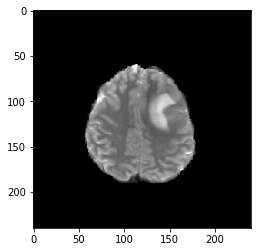

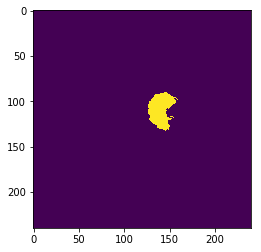

In [59]:
plt.figure()
plt.imshow(t2_now[110], cmap = 'gray')
plt.figure()
plt.imshow(seg_now[110])